<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/Hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

# In[2]:
#creating tensors for the training data

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

#finding relationship between t_u and t_c (changed to non linear)
def model(t_u, w1, w2, b):
  return w2*t_u**2 + w1*t_u + b

#loss function
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()



In [ ]:
#check the value of the loss with test inputs
w1 = torch.ones(())
w2 = torch.ones(()) #initial W is 1
b = torch.zeros(()) #initial b is 0
t_p = model(t_u, w1, w2, b)
print(t_p)

loss = loss_fn(t_p, t_c)
loss


tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])


tensor(11709471.)

In [ ]:
#training loop function
def training_loop(n_epochs, opt, params, t_u, t_c, clip_val):

  print("training loop called")
  loss_values = []
  for epoch in range(1, n_epochs+1):

    opt.zero_grad() #clears the old gradients from parameters in the model that will be updated
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss.backward()

    nn.utils.clip_grad_norm_(params, clip_val) #preventing the gradient from exploding

    opt.step() #updates the values of the parameters based on the gradients from loss.backward and the learning rate that is in the optimizer

    loss_values.append(loss.item()) #adding the current value of loss to the losses

    #not needed with opt.step
    # with torch.no_grad():
    #   params -= learning_rate * params.grad

    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" % (epoch, loss.item()))


  return loss_values



learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_lr_SGD = None
lowest_loss = float('inf') #sets this equal to infinite to avoid an error when finding the lowest loss later
best_opt = None






 training with SGD. current learning rate: 0.1
training loop called
Epoch 500, Loss 1681.746216
Epoch 1000, Loss 1658.093628
Epoch 1500, Loss 1645.795288
Epoch 2000, Loss 1636.979370
Epoch 2500, Loss 1632.646606
Epoch 3000, Loss 1631.387817
Epoch 3500, Loss 1632.076172
Epoch 4000, Loss 1634.042969
Epoch 4500, Loss 1634.982910
Epoch 5000, Loss 1636.060059

 found new lowest loss:  1636.06005859375

 training with SGD. current learning rate: 0.01
training loop called
Epoch 500, Loss 89715.273438
Epoch 1000, Loss 89664.562500
Epoch 1500, Loss 89616.367188
Epoch 2000, Loss 89570.953125
Epoch 2500, Loss 89528.062500
Epoch 3000, Loss 89488.406250
Epoch 3500, Loss 89451.101562
Epoch 4000, Loss 89416.734375
Epoch 4500, Loss 89383.843750
Epoch 5000, Loss 89353.281250

 training with SGD. current learning rate: 0.001
training loop called
Epoch 500, Loss 226.318695
Epoch 1000, Loss 220.948730
Epoch 1500, Loss 215.976700
Epoch 2000, Loss 211.327682
Epoch 2500, Loss 206.962265
Epoch 3000, Loss 202

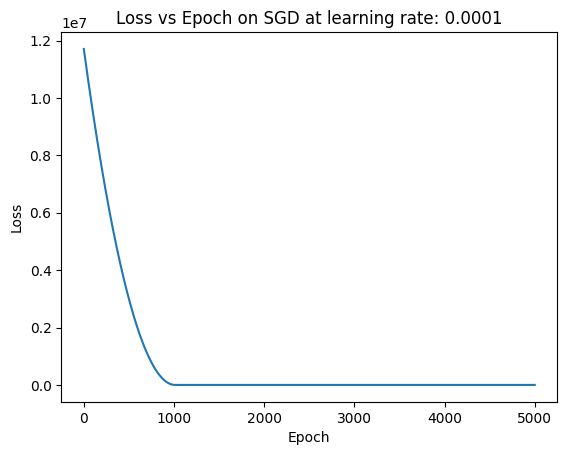


 training with Adam. current learning rate: 0.1
training loop called
Epoch 500, Loss 1584.828979
Epoch 1000, Loss 1333.241699
Epoch 1500, Loss 2001.043091
Epoch 2000, Loss 1455.263428
Epoch 2500, Loss 1220.913086
Epoch 3000, Loss 2144.275146
Epoch 3500, Loss 965.684387
Epoch 4000, Loss 915.649475
Epoch 4500, Loss 2534.127930
Epoch 5000, Loss 747.160583

 found new lowest loss:  747.1605834960938

 training with Adam. current learning rate: 0.01
training loop called
Epoch 500, Loss 3.438300
Epoch 1000, Loss 68.575996
Epoch 1500, Loss 45.655228
Epoch 2000, Loss 90.256500
Epoch 2500, Loss 22.220133
Epoch 3000, Loss 82.819641
Epoch 3500, Loss 24.856171
Epoch 4000, Loss 77.664993
Epoch 4500, Loss 27.628664
Epoch 5000, Loss 72.572639

 found new lowest loss:  72.57263946533203

 training with Adam. current learning rate: 0.001
training loop called
Epoch 500, Loss 2914827.000000
Epoch 1000, Loss 54.685436
Epoch 1500, Loss 3.559664
Epoch 2000, Loss 3.792247
Epoch 2500, Loss 3.573347
Epoch 300

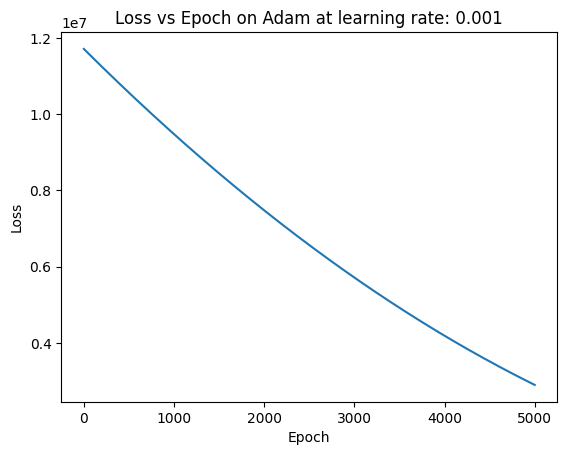

training loop called
Epoch 500, Loss 3006426.750000
Epoch 1000, Loss 2003.343750
Epoch 1500, Loss 202.019180
Epoch 2000, Loss 196.807526
Epoch 2500, Loss 191.798096
Epoch 3000, Loss 186.944244
Epoch 3500, Loss 182.227112
Epoch 4000, Loss 177.637405
Epoch 4500, Loss 173.169281
Epoch 5000, Loss 168.818909


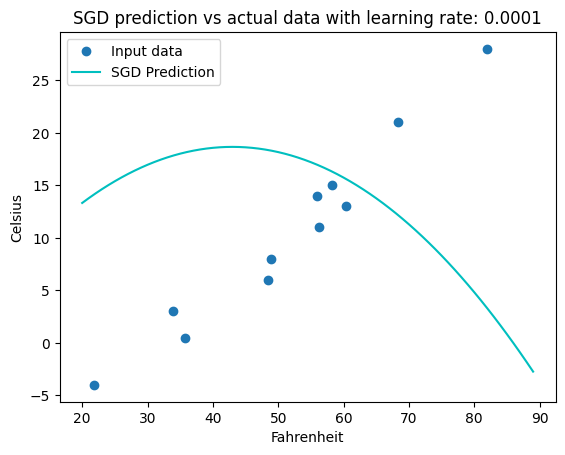

training loop called
Epoch 500, Loss 2914827.000000
Epoch 1000, Loss 54.685436
Epoch 1500, Loss 3.559664
Epoch 2000, Loss 3.792247
Epoch 2500, Loss 3.573347
Epoch 3000, Loss 3.539410
Epoch 3500, Loss 3.774061
Epoch 4000, Loss 5.218380
Epoch 4500, Loss 3.207972
Epoch 5000, Loss 3.352944


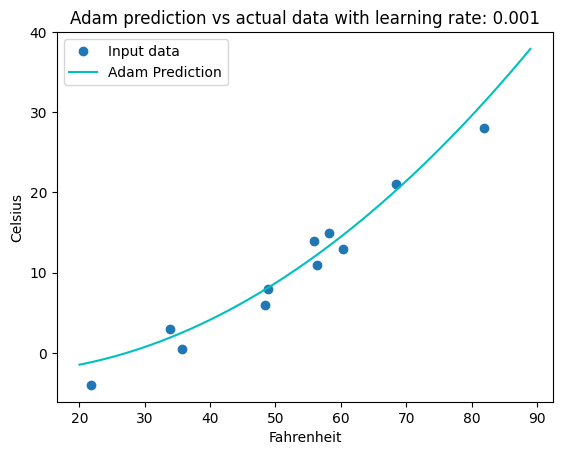

In [ ]:

#doing SGD first
SGD_losses = []
for lr in learning_rates:
  print("\n training with SGD. current learning rate:", lr)

  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) #setting initial params
  opt = torch.optim.SGD([params], lr = lr)                   #choosing optimizer SGD with the params and learning rate
  loss_vals = training_loop(n_epochs = 5000, opt = opt, params = params, t_u = t_u, t_c = t_c, clip_val = 10)
  final_loss = loss_vals[-1]
  if final_loss < lowest_loss:
    print("\n found new lowest loss: ", final_loss)
    lowest_loss = final_loss
    best_lr_SGD = lr
  SGD_losses.append(loss_vals) #each index corresponds to each learning rate, should probably use a map here but


print("lowest loss is", lowest_loss)
print("Best learning rate for SGD is: ", best_lr_SGD)

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch on SGD at learning rate: "+str(best_lr_SGD))
plt.plot(loss_vals)
plt.show()






#doing Adam second
best_lr_Adam = None
lowest_loss = float('inf') #sets this equal to infinite to avoid an error when finding the lowest loss later
best_opt = None


Adam_losses = []
for lr in learning_rates:
  print("\n training with Adam. current learning rate:", lr)

  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) #setting initial params
  opt = torch.optim.Adam([params], lr = lr)                   #choosing optimizer SGD with the params and learning rate
  loss_vals = training_loop(n_epochs = 5000, opt = opt, params = params, t_u = t_u, t_c = t_c, clip_val = 10)
  final_loss = loss_vals[-1]
  if final_loss < lowest_loss:
    print("\n found new lowest loss: ", final_loss)
    lowest_loss = final_loss
    best_lr_Adam = lr
  Adam_losses.append(loss_vals) #each index corresponds to each learning rate, should probably use a map here but

print("lowest loss is", lowest_loss)

print("\n\n\nBest learning rate for Adam is: ", best_lr_Adam)

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch on Adam at learning rate: "+str(best_lr_Adam))
plt.plot(loss_vals)
plt.show()



#retraining the model
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) #setting initial params
opt = torch.optim.SGD([params], lr = best_lr_SGD)   #choosing optimizer SGD with the params and learning rate
loss_vals = training_loop(n_epochs = 5000, opt = opt, params = params, t_u = t_u, t_c = t_c, clip_val = 10)



#plotting the actual predictions vs the original data
plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.title("SGD prediction vs actual data with learning rate: "+str(best_lr_SGD))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Input data')
plt.plot(torch.arange(20.,90.), model(torch.arange(20.,90.).unsqueeze(1), *params).detach().numpy(), 'c-', label='SGD Prediction')
plt.legend()
plt.show()





#retraining the model Adam
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) #setting initial params
opt = torch.optim.Adam([params], lr = best_lr_Adam)   #choosing optimizer SGD with the params and learning rate
loss_vals = training_loop(n_epochs = 5000, opt = opt, params = params, t_u = t_u, t_c = t_c, clip_val = 10)

#plotting the actual predictions vs the original data for ADAM
plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.title("Adam prediction vs actual data with learning rate: "+str(best_lr_Adam))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Input data')
plt.plot(torch.arange(20.,90.), model(torch.arange(20.,90.).unsqueeze(1), *params).detach().numpy(), 'c-', label='Adam Prediction')
plt.legend()
plt.show()






